# Logistic Regression (Binary Classification)

In [2]:
import pandas as pd 
h = pd.read_csv("insurance_data.csv")
h.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
%matplotlib inline 

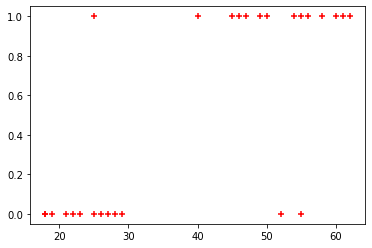

In [6]:
plt.scatter(h['age'],h['bought_insurance'],marker = "+",color = "Red")

In [9]:
from sklearn.model_selection import train_test_split


G:\Himel.conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
x_train, x_test, y_train, y_test  = train_test_split(h[['age']],h.bought_insurance,test_size = 0.1)

In [11]:
x_test

,age
18,19
21,26
12,27


In [12]:
x_train

,age
20,21
22,40
24,50
9,61
1,25
14,49
7,60
17,58
3,52
2,47


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
model.predict(x_test)

array([0, 0, 0], dtype=int64)

In [17]:
model.score(x_test,y_test)

1.0

In [18]:
model.predict_proba(x_test)

array([[0.90887676, 0.09112324],
       [0.80763353, 0.19236647],
       [0.78769604, 0.21230396]])

In [20]:
model.predict([[26]])

G:\Himel.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Excercise 

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
* Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
* Plot bar charts showing impact of employee salaries on retention
* Plot bar charts showing corelation between department and employee retention
* Now build logistic regression model using variables that were narrowed down in step 1
* Measure the accuracy of the model
1
import pandas as pd 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#first task
hr = pd.read_csv("HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.shape

(14999, 10)

In [6]:
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
hr.left.unique() # 1 means left and 0 mean carry

array([1, 0], dtype=int64)

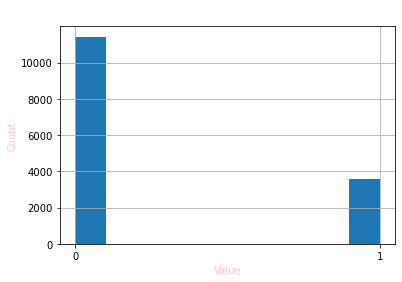

In [18]:
plt.hist(hr.left)
plt.title('Count of \'0\' as Not left and \'1\' is left column', color = "white",pad = 10)
plt.xlabel('Value', color = "pink")
plt.ylabel('Count', color = "pink")
plt.xticks([0, 1])
plt.grid(True)

plt.show()

In [19]:
hr['left'].shape

(14999,)

In [20]:
leave = hr[hr.left == 1]
leave.shape

(3571, 10)

In [21]:
carry = hr[hr.left == 0]
carry.shape

(11428, 10)

In [22]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

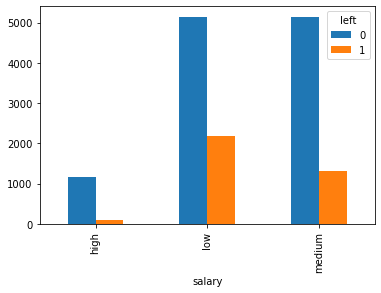

In [23]:
#second task
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

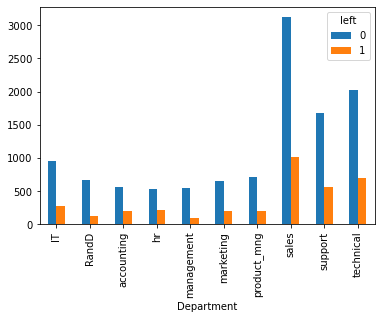

In [24]:
#third task
pd.crosstab(hr.Department,hr.left).plot(kind='bar')

In [25]:
#fourth task
xp = hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
xp.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [26]:
dummy = pd.get_dummies(xp.salary)
dummy

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [27]:
hr1 = pd.concat([xp,dummy],axis = 'columns')
hr1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [28]:
hr1.drop('salary',axis = 'columns', inplace = True)

In [30]:
hr1

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [31]:
X = hr1
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [32]:
Y = hr.left
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression

In [66]:
k = LogisticRegression()

In [68]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1)

In [78]:
k.fit(X_train,Y_train)

LogisticRegression()

In [79]:
k.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
#fifth task
k.score(X_test,Y_test)

0.772

In [81]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
12329,0.44,148,0,0,1,0
2738,0.65,220,0,0,1,0
476,0.11,271,0,0,1,0
14086,0.42,174,0,0,1,0
8631,0.19,145,0,0,1,0
...,...,...,...,...,...,...
6197,0.15,229,0,0,1,0
12331,0.11,302,0,0,1,0
11465,0.55,178,1,0,1,0
6877,0.74,255,0,0,0,1


In [86]:
k.predict([[0.50,100,1,0,0,1]])

G:\Himel.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)